In [6]:
import pickle
import pymc3 as pm
from dist_utils import parameter_table, get_assignments
from generate_data import vectorize_all_responses

In [4]:
X, functions, goals = vectorize_all_responses()
fmax = functions.argmax(axis=1)

# Var + MES

In [5]:
with open('var_mes_trace.pkl', 'rb') as f:
    var_mes_trace = pickle.load(f)

INFO (theano.gof.compilelock): Waiting for existing lock by unknown process (I am process '11032')
INFO (theano.gof.compilelock): To manually release the lock, delete C:\Users\bmontambault\AppData\Local\Theano\compiledir_Windows-10-10.0.17763-SP0-Intel64_Family_6_Model_158_Stepping_9_GenuineIntel-3.6.5-64\lock_dir


In [12]:
var_mes_trace_df = pm.trace_to_dataframe(var_mes_trace)
var_mes_params = parameter_table(var_mes_trace_df, ['var_param', 'mes_param', 'temperature'], {'cluster': '$\\theta$', 'mes_param':'$\\alpha$', 'var_param':'$\\beta$', 'temperature':'$\\tau$'})

 E:\Projects\Git\Public\Active-Learning\individual_differences\models\dist_utils.py:44: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
 E:\Projects\Git\Public\Active-Learning\individual_differences\models\dist_utils.py:45: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [13]:
var_mes_params

,$\theta$,$\alpha$,$\beta$,$\tau$
0,0,12.83 $\pm$ 7.72,1.56 $\pm$ 2.05,0.98 $\pm$ 1.61
1,1,11.54 $\pm$ 11.96,2.91 $\pm$ 2.71,0.31 $\pm$ 0.28
2,2,14.91 $\pm$ 8.71,2.84 $\pm$ 2.15,0.63 $\pm$ 0.4
3,3,4.13 $\pm$ 4.9,5.3 $\pm$ 2.85,1.75 $\pm$ 1.28
4,4,0.79 $\pm$ 0.75,1.92 $\pm$ 2.2,0.7 $\pm$ 0.58
5,5,2.13 $\pm$ 2.86,3.3 $\pm$ 2.5,2.59 $\pm$ 2.66
6,6,5.37 $\pm$ 8.21,3.3 $\pm$ 3.51,0.18 $\pm$ 0.16
7,7,3.08 $\pm$ 3.32,2.18 $\pm$ 2.91,1.3 $\pm$ 1.01
8,8,1.11 $\pm$ 1.59,2.53 $\pm$ 2.32,0.95 $\pm$ 0.72
9,9,3.03 $\pm$ 3.47,3.92 $\pm$ 3.6,0.67 $\pm$ 0.52


Each 2x3 set of plots shows the actions of the participants assigned to each cluster. The rows are the goal conditions (max-score, find-max) and the columns are functions (linear, quadratic, sinc). 

cluster=0


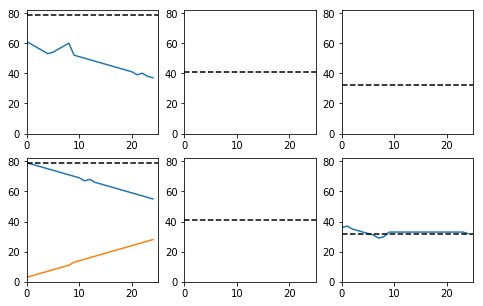

cluster=1


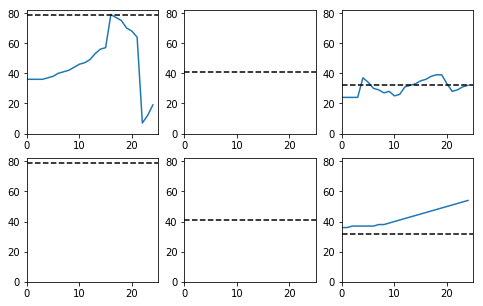

cluster=2


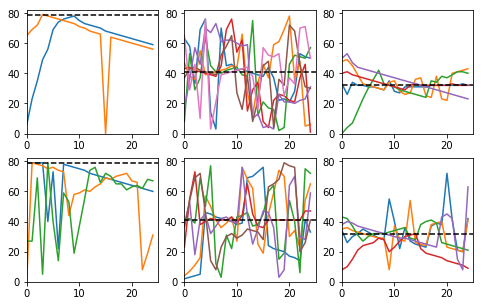

cluster=3


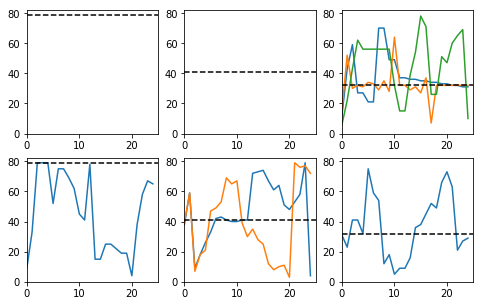

cluster=4


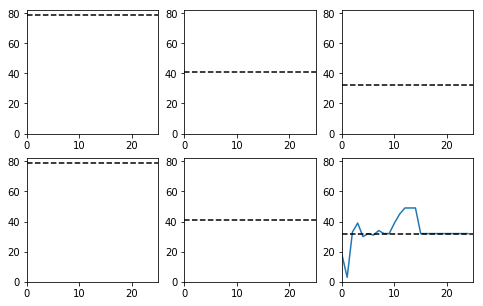

cluster=5


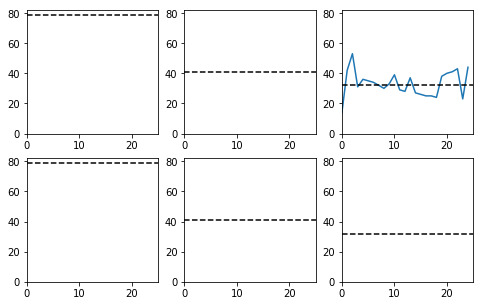

cluster=6


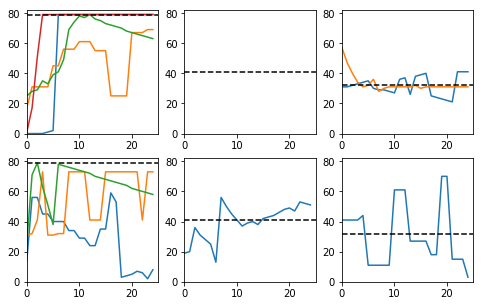

cluster=7


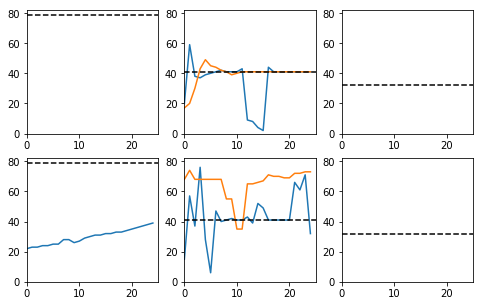

cluster=8


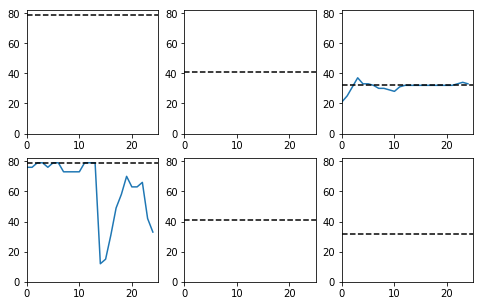

cluster=9


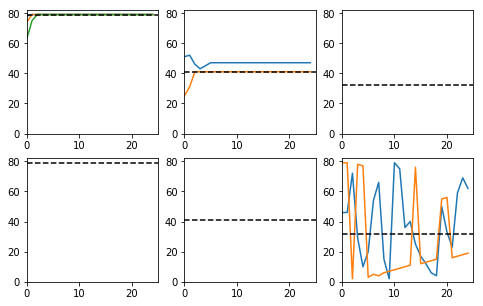

In [14]:
var_mes_assignments = get_assignments(var_mes_trace_df, X, fmax, goals)

In [54]:
var_mes_cluster_freq = var_mes_assignments.sum(axis=2).sum(axis=1)
var_mes_cluster_prob = var_mes_cluster_freq / var_mes_cluster_freq.sum()

In [55]:
var_mes_function_freq = var_mes_assignments.sum(axis=2)
var_mes_function_prob = var_mes_function_freq / var_mes_function_freq.sum(axis=1)[:,None]

In [56]:
var_mes_prob_cluster_given_function = var_mes_function_prob * var_mes_cluster_prob[:,None] / (var_mes_function_prob * var_mes_cluster_prob[:,None]).sum(axis=0)

In [57]:
var_mes_prob_cluster_given_function

array([[0.13636364, 0.        , 0.04      ],
       [0.04545455, 0.        , 0.08      ],
       [0.22727273, 0.59090909, 0.4       ],
       [0.04545455, 0.09090909, 0.16      ],
       [0.        , 0.        , 0.04      ],
       [0.        , 0.        , 0.04      ],
       [0.31818182, 0.04545455, 0.12      ],
       [0.04545455, 0.18181818, 0.        ],
       [0.04545455, 0.        , 0.04      ],
       [0.13636364, 0.09090909, 0.08      ]])

1) $\theta_{6}$ has high probability given a linear reward function, and relatively low probability given quadratic or sinc functions.

2) $\theta_{2}$ has high probability given a quadratic or sinc function, and relatively low probability a linear function.

$\theta_{6}$ and $\theta_{2}$ have similar $\beta$ parameters, but $\theta_{2}$ has a much larger $\alpha$ parameter. We might conclude that, since participants in the linear function condition were in many cases able to find the maximum quickly, they do not need to utilize uncertainty about the mean in their exploration. Additionally, $\theta_{6}$ also had a lower $\tau$ parameter, indicating that participants in this cluster performed less random exploration.

In [58]:
var_mes_goal_freq = var_mes_assignments.sum(axis=1)
var_mes_goal_prob = var_mes_goal_freq / var_mes_goal_freq.sum(axis=1)[:,None]

In [59]:
var_mes_prob_cluster_given_goal = var_mes_goal_prob * var_mes_cluster_prob[:,None] / (var_mes_goal_prob * var_mes_cluster_prob[:,None]).sum(axis=0)

In [60]:
var_mes_prob_cluster_given_goal

array([[0.02857143, 0.08823529],
       [0.05714286, 0.02941176],
       [0.4       , 0.41176471],
       [0.08571429, 0.11764706],
       [0.        , 0.02941176],
       [0.02857143, 0.        ],
       [0.17142857, 0.14705882],
       [0.05714286, 0.08823529],
       [0.02857143, 0.02941176],
       [0.14285714, 0.05882353]])

1) $\theta_{2}$ had the highest probability given both find-max and max-score conditions. This cluster had a higher $\alpha$ than all others, indicating that participants in both goal conditions were likely to use uncertainty about the function maximum to guide exploration. This might indicate that participants are overly cautious in the max-score condition, preferring to choose actions that reduce uncertainty about the maximum rather than exploit an action with a known reward.

2) All clusters had similar probabilities given the two goal conditions. This might indicate that people choose general heuristics for solving explore-exploit tasks rather than selecting a strategy that fits the goal of the task. However, given that there were several clusters uncovered with widely varied exploration parameters, it is likely that this strategy widely varies from person to person.

# Var MES Switch

In [17]:
with open('var_mes_switch.pkl', 'rb') as f:
    var_mes_switch_trace = pickle.load(f)

In [18]:
var_mes_switch_trace_df = pm.trace_to_dataframe(var_mes_switch_trace)
var_mes_switch_params = parameter_table(var_mes_switch_trace_df, ['temperature', 'explore_method', 'explore_param'],
                          {'cluster':'$\\theta$', 'temperature':'$\\tau$', 'explore_method':'$\\mu$', 'explore_param':'$\\beta$'})

 E:\Projects\Git\Public\Active-Learning\individual_differences\models\dist_utils.py:44: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
 E:\Projects\Git\Public\Active-Learning\individual_differences\models\dist_utils.py:45: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [19]:
var_mes_switch_params

,$\theta$,$\tau$,$\mu$,$\beta$
0,0,1.62 $\pm$ 1.45,0.36 $\pm$ 0.48,7.85 $\pm$ 10.46
1,1,0.36 $\pm$ 0.33,1.0 $\pm$ 0.0,13.11 $\pm$ 10.8
2,2,2.54 $\pm$ 2.99,0.52 $\pm$ 0.5,2.42 $\pm$ 2.69
3,3,0.5 $\pm$ 0.49,0.13 $\pm$ 0.33,0.57 $\pm$ 0.51
4,4,0.95 $\pm$ 0.88,0.19 $\pm$ 0.39,1.64 $\pm$ 1.65
5,5,0.86 $\pm$ 0.69,0.26 $\pm$ 0.44,7.02 $\pm$ 5.22
6,7,1.36 $\pm$ 0.97,0.53 $\pm$ 0.5,5.17 $\pm$ 5.61


cluster=0


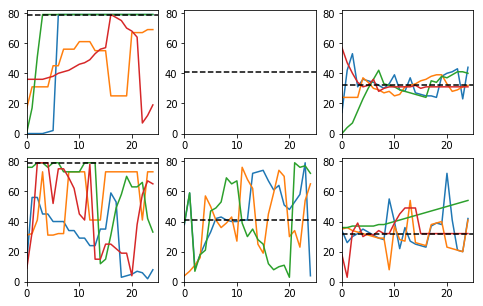

cluster=1


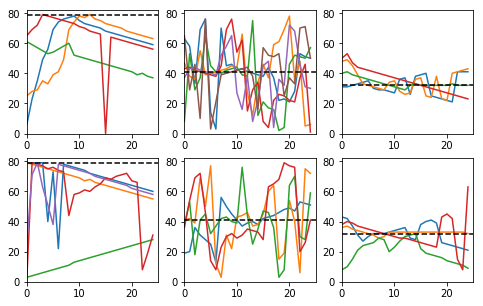

cluster=2


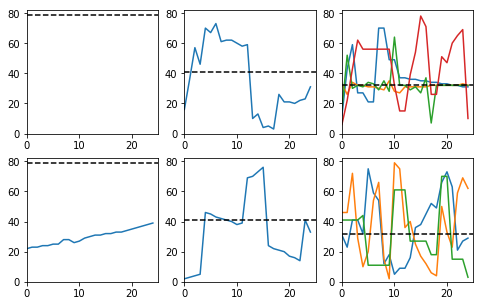

cluster=3


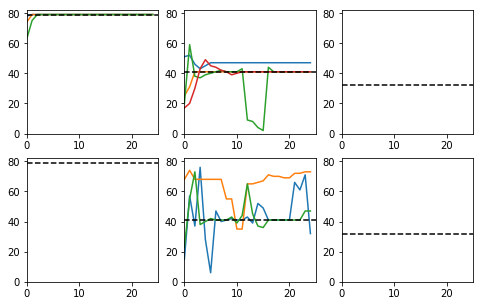

cluster=4


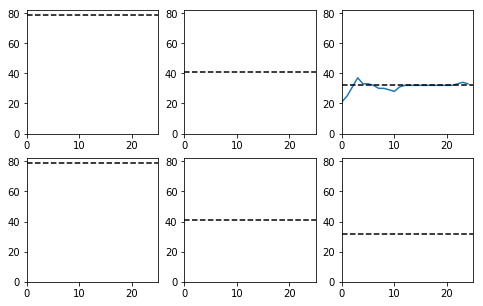

cluster=5


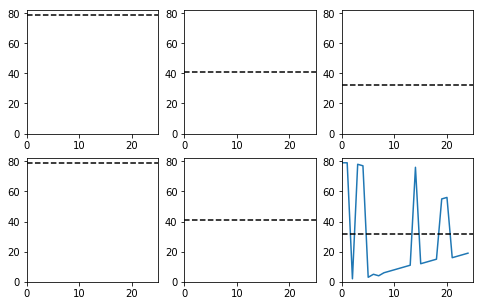

cluster=7


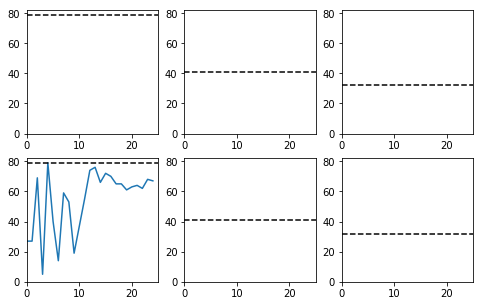

In [68]:
switch_assignments = get_assignments(var_mes_switch_trace_df, X, fmax, goals)

In [69]:
switch_cluster_freq = switch_assignments.sum(axis=2).sum(axis=1)
switch_cluster_prob = switch_cluster_freq / switch_cluster_freq.sum()

In [70]:
switch_function_freq = switch_assignments.sum(axis=2)
switch_function_prob = switch_function_freq / switch_function_freq.sum(axis=1)[:,None]

In [71]:
switch_prob_cluster_given_function = switch_function_prob * switch_cluster_prob[:,None] / (switch_function_prob * switch_cluster_prob[:,None]).sum(axis=0)

In [72]:
switch_prob_cluster_given_function

array([[0.36363636, 0.13636364, 0.32      ],
       [0.40909091, 0.45454545, 0.32      ],
       [0.04545455, 0.09090909, 0.28      ],
       [0.13636364, 0.31818182, 0.        ],
       [0.        , 0.        , 0.04      ],
       [0.        , 0.        , 0.04      ],
       [0.04545455, 0.        , 0.        ]])

In [73]:
switch_goal_freq = switch_assignments.sum(axis=1)
switch_goal_prob = switch_goal_freq / switch_goal_freq.sum(axis=1)[:,None]

In [74]:
switch_prob_cluster_given_goal = switch_goal_prob * switch_cluster_prob[:,None] / (switch_goal_prob * switch_cluster_prob[:,None]).sum(axis=0)

In [75]:
switch_prob_cluster_given_goal

array([[0.22857143, 0.32352941],
       [0.4       , 0.38235294],
       [0.14285714, 0.14705882],
       [0.2       , 0.08823529],
       [0.02857143, 0.        ],
       [0.        , 0.02941176],
       [0.        , 0.02941176]])